#### *Team 2*  
Dina Shalaby  
Joseph Binny  
Trevor Hanson<br><br>

[code presentation on youtube](https://youtu.be/-EJIm6D3WAI)

|column|definition|
|---|---|
|**date**|Date in format DD/MM/YYYY|
|**tmax**|Maximum temperature of the day in °F|
|**tmin**|Minimum temperature of the day in °F|
|**tavg**|Average temperature of the day in °F|
|**departure**|Departure from normal temperature in °F|
|**HDD**|Heating Degree Days|
|**CDD**|Cooling Degree Days|
|**precipitation**|Precipitation in inches|
|**new_snow**|New snowfall in inches|
|**snow_depth**|Snowfall depth in inches.|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from matplotlib.dates import DateFormatter
from statsmodels.graphics.gofplots import ProbPlot
from scipy import stats
import math
from mpl_toolkits import mplot3d

# 1. Data Importing and Pre-processing:

In [2]:
df = pd.read_csv("nyc_temperature.csv")

# change the dates to a Timestamp
df["date"] = df["date"].apply(pd.to_datetime)
print(type(df["date"][0]))
# df.loc[df["precipitation"] == "T"].count()
df.head(13)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,2019-01-01,60,40,50.0,13.9,15,0,0.08,0,0
1,2019-02-01,41,35,38.0,2.1,27,0,0,0,0
2,2019-03-01,45,39,42.0,6.3,23,0,T,0,0
3,2019-04-01,47,37,42.0,6.5,23,0,0,0,0
4,2019-05-01,47,42,44.5,9.1,20,0,0.45,0,0
5,2019-06-01,49,32,40.5,5.3,24,0,T,0,0
6,2019-07-01,35,26,30.5,-4.5,34,0,0,0,0
7,2019-08-01,47,35,41.0,6.1,24,0,0.21,0,0
8,2019-09-01,46,35,40.5,5.8,24,0,0.07,0,0
9,2019-10-01,35,30,32.5,-2.1,32,0,0,0,0


In [3]:
# We clean out the T values from the last three columns

df["precipitation"] = df["precipitation"].replace({"T": 0})
df["new_snow"] = df["new_snow"].replace({"T": 0})
df["snow_depth"] = df["snow_depth"].replace({"T": 0})

In [4]:
# just making sure we don't have any T's left -> we don't!

# df.loc[df["precipitaion"] == "T"]
# df.loc[df["new_snow"] == "T"]
# df.loc[df["snow_depth"] == "T"]

In [5]:
# checking the type of data in the last three columns.. we want them to be floats

print(type(df["precipitation"][0]))
print(type(df["new_snow"][0]))
print(type(df["snow_depth"][0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [6]:
# We transform these columns' data to type float

df["precipitation"] = df["precipitation"].apply(float)
df["new_snow"] = df["new_snow"].apply(float)
df["snow_depth"] = df["snow_depth"].apply(float)

# 2. Statistical Analysis and Visualization:

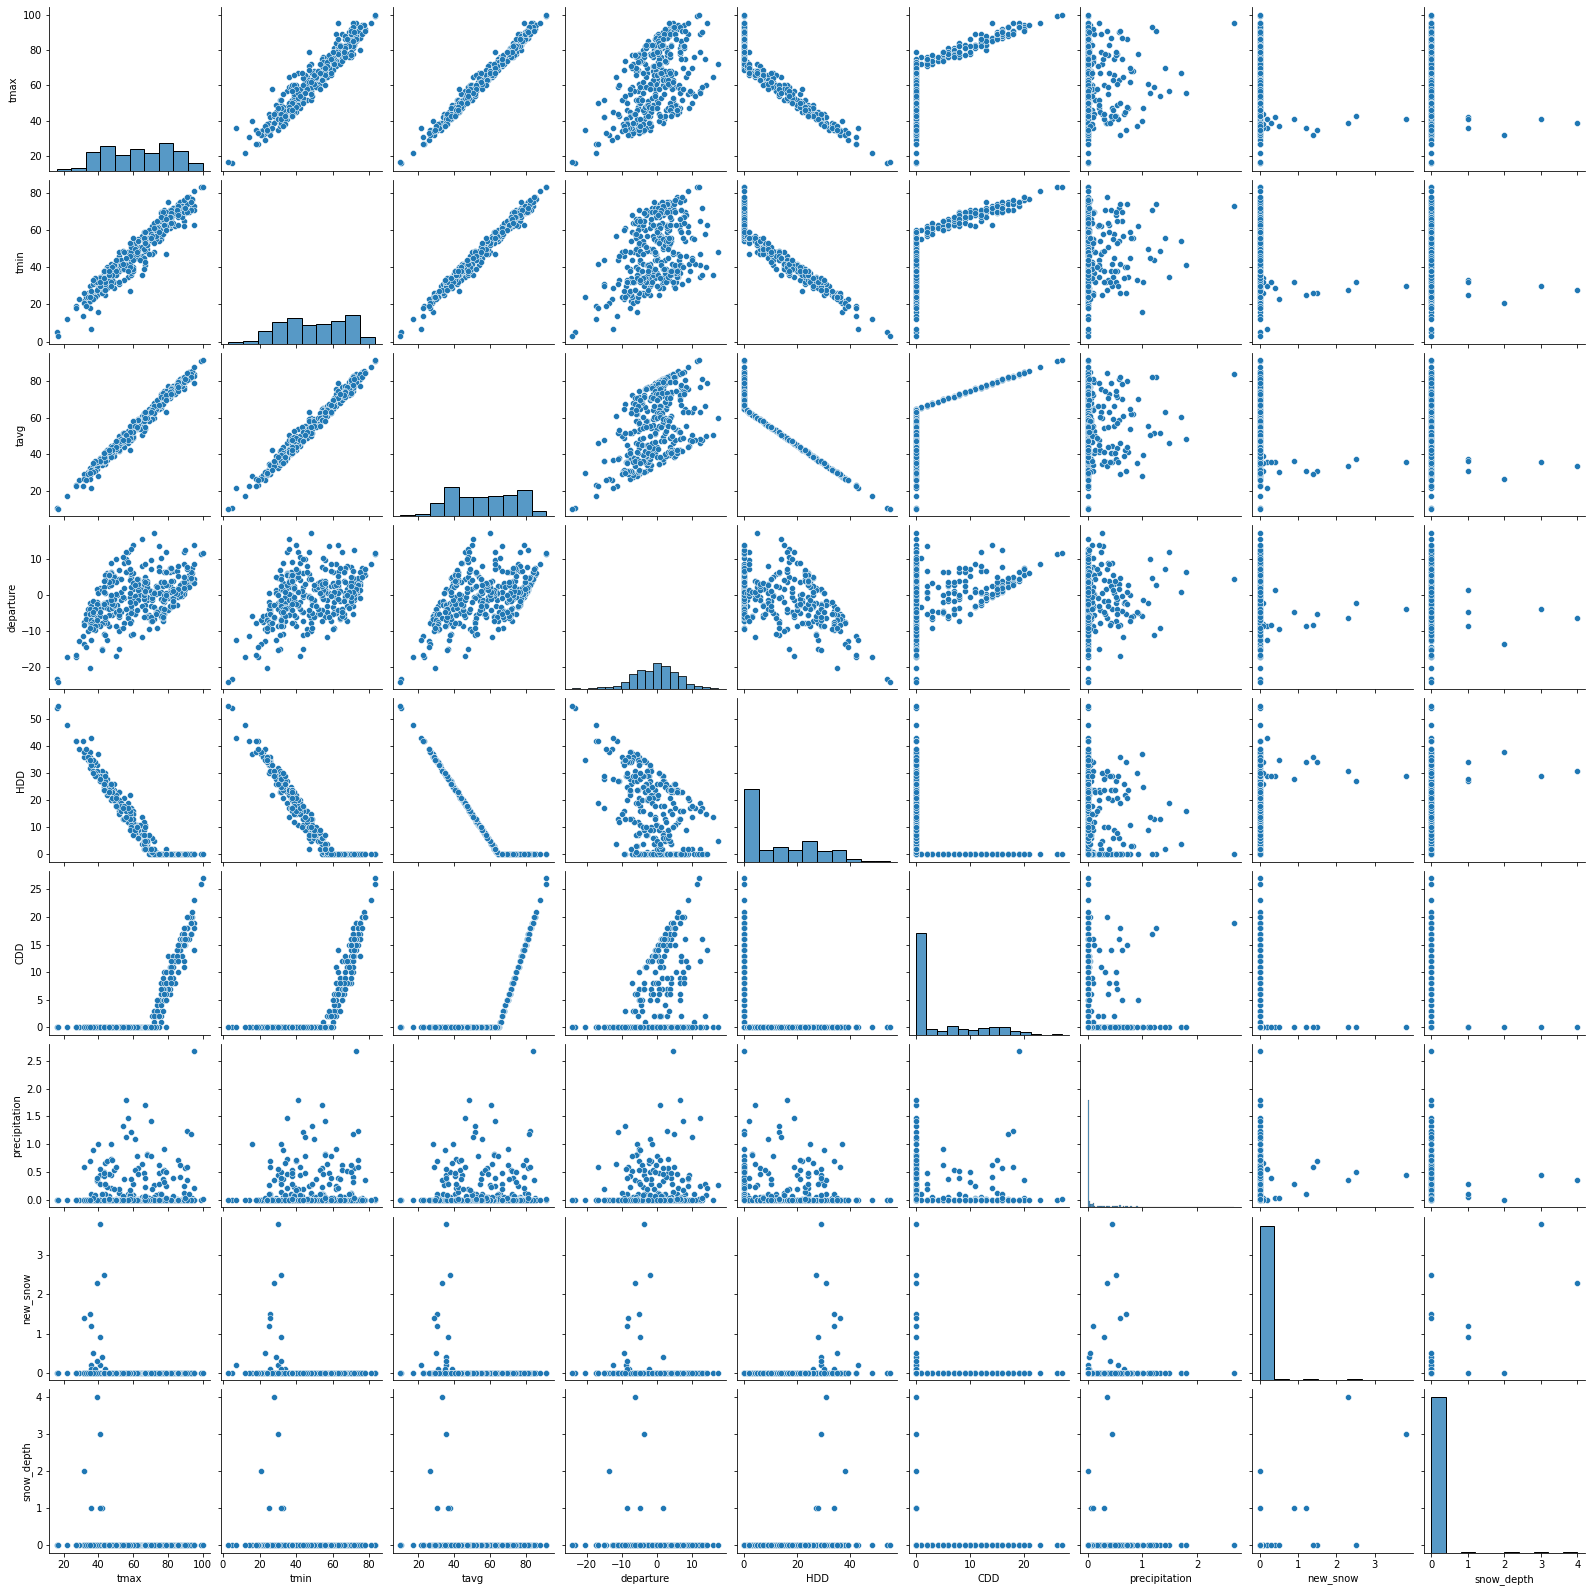

In [7]:
sns.pairplot(df)

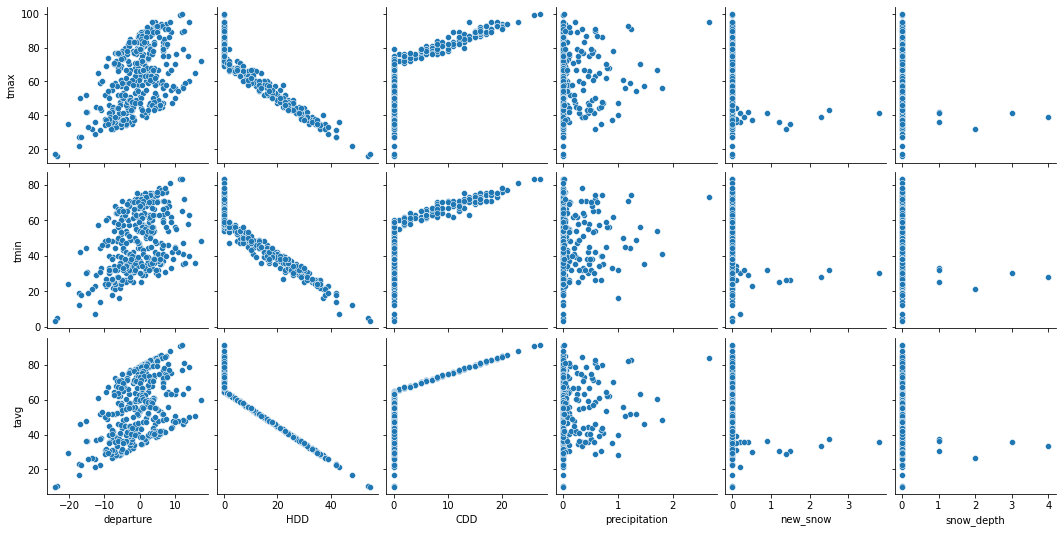

In [8]:
x_vars = ["departure", "HDD", "CDD", "precipitation", "new_snow", "snow_depth"]
y_vars = ["tmax", "tmin", "tavg"]

# sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, kind="reg") #decided not go print with a linear regression line
sns.pairplot(df, x_vars=x_vars, y_vars=y_vars)

In [9]:
df.corr()

,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tmax,1.000000,0.964680,0.991930,0.504420,-0.948704,0.801030,0.008210,-0.183409,-0.146762
tmin,0.964680,1.000000,0.990294,0.433581,-0.951052,0.792244,0.015270,-0.174763,-0.141384
tavg,0.991930,0.990294,1.000000,0.474830,-0.958306,0.803954,0.011681,-0.180886,-0.145484
departure,0.504420,0.433581,0.474830,1.000000,-0.477517,0.332172,0.033311,-0.104159,-0.100274
HDD,-0.948704,-0.951052,-0.958306,-0.477517,1.000000,-0.600872,-0.025594,0.197466,0.159156
CDD,0.801030,0.792244,0.803954,0.332172,-0.600872,1.000000,-0.020160,-0.091041,-0.071355
precipitation,0.008210,0.015270,0.011681,0.033311,-0.025594,-0.020160,1.000000,0.121013,0.044353
new_snow,-0.183409,-0.174763,-0.180886,-0.104159,0.197466,-0.091041,0.121013,1.000000,0.693532
snow_depth,-0.146762,-0.141384,-0.145484,-0.100274,0.159156,-0.071355,0.044353,0.693532,1.000000


In [10]:
df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr()

,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tavg,1.000000,0.474830,-0.958306,0.803954,0.011681,-0.180886,-0.145484
departure,0.474830,1.000000,-0.477517,0.332172,0.033311,-0.104159,-0.100274
HDD,-0.958306,-0.477517,1.000000,-0.600872,-0.025594,0.197466,0.159156
CDD,0.803954,0.332172,-0.600872,1.000000,-0.020160,-0.091041,-0.071355
precipitation,0.011681,0.033311,-0.025594,-0.020160,1.000000,0.121013,0.044353
new_snow,-0.180886,-0.104159,0.197466,-0.091041,0.121013,1.000000,0.693532
snow_depth,-0.145484,-0.100274,0.159156,-0.071355,0.044353,0.693532,1.000000


<AxesSubplot:>

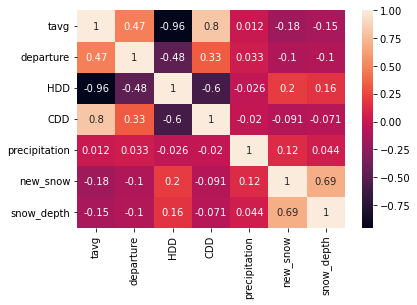

In [11]:
sns.heatmap(df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr(), annot=True)

# `Analying the correlation`<br>
It seems like `departure` and `HDD` and `CDD`  
are well correlated with `tavg` but not the other columns  
Thus we'll use them in our regression model. We omitted `tmin` and `tmax` as we felt like it'd be too easy.  
We will do a multicolliniarity test on them first though to make sure  
they're not collinear or multicollinear

In [12]:
# calculate_vif was taken from
#https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [13]:
tavg_df = df[["tavg","departure","HDD","CDD"]]

calculate_vif(tavg_df, features=["departure","HDD","CDD"])

,VIF,Tolerance
departure,1.300773,0.768774
HDD,1.811162,0.552132
CDD,1.571583,0.636301


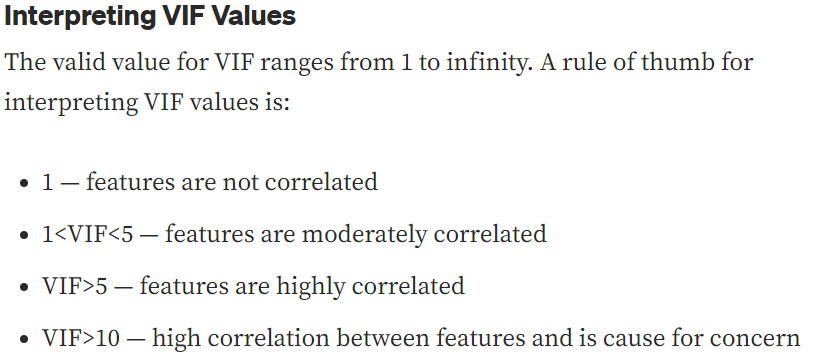

#### Since the `variance inflation factor` isn't alarmingly high among the relevant columns, we will not ommit any of these variables from the model.

# 3. Regression Model

In [14]:
X = df[["departure","HDD","CDD"]]
y = df["tavg"]

tavg_reg = LinearRegression().fit(X,y)
tavg_predicted = tavg_reg.predict(X)

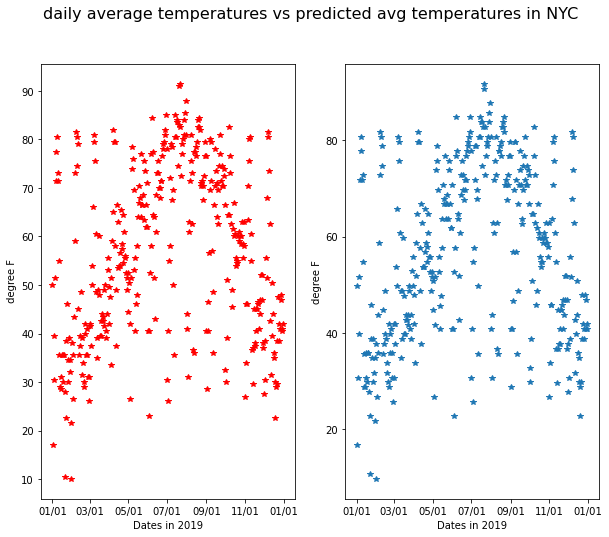

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("daily average temperatures"+
             " vs predicted avg temperatures in NYC", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel=" degree F")
ax2.set(xlabel="Dates in 2019",
       ylabel="degree F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tavg"], "r*")
ax2.plot(df["date"],tavg_predicted, "*")
plt.show()

In [16]:
tavg_residuals = df["tavg"] - tavg_predicted
print(tavg_reg.score(X,y))

0.9998057764134336


$$R^2 = 0.9998$$

In [17]:
OLS_model = sm.OLS(y, sm.add_constant(X))
model_fit = OLS_model.fit()
model_fitted_y = model_fit.fittedvalues
model_fit.summary()

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tavg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.194e+05
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:36:07   Log-Likelihood:                -9.0216
No. Observations:                 365   AIC:                             26.04
Df Residuals:                     361   BIC:                             41.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7296      0.027   2403.285      0.000      64.677      64.783
departure      0.0039      0.002      1.660      0.098      -0.001       0.008
HDD           -0.9984      0.001   -752.849      0.000      -1.001      -0.996
CDD            0.9979      0.003    388.184      0.000       0.993       1.003
==============================================================================
Omnibus:                     1690.482   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.560
Skew:                           0.090   Prob(JB):                     3.17e-13
Kurtosis:                       1.063   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

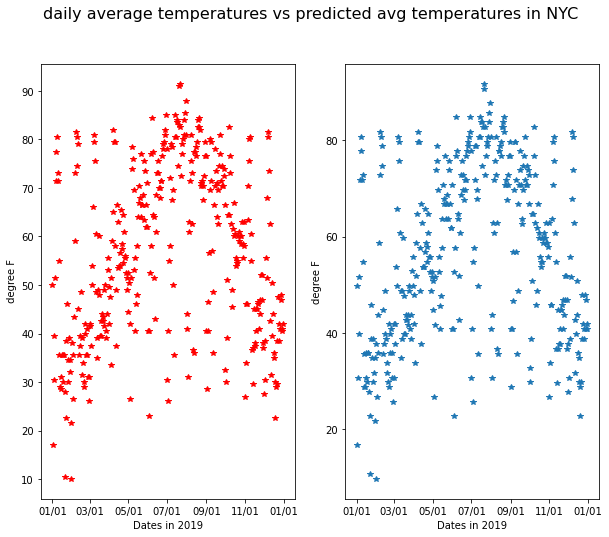

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("daily average temperatures"+
             " vs predicted avg temperatures in NYC", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel=" degree F")
ax2.set(xlabel="Dates in 2019",
       ylabel="degree F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tavg"], "r*")
ax2.plot(df["date"],model_fitted_y, "*")
plt.show()

C:\Users\yousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


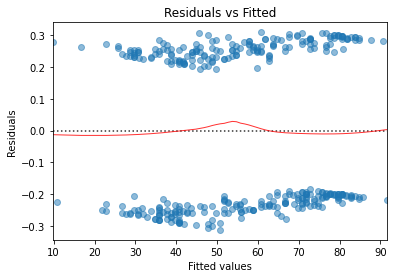

In [19]:

desired_df = pd.concat([X, y], axis=1) # creating a df from X, y for easier plot handling

model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # normalize residuals

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absoulte squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals

model_leverage = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, desired_df.columns[-1], data=desired_df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={"color":"red", "lw":1, "alpha":0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


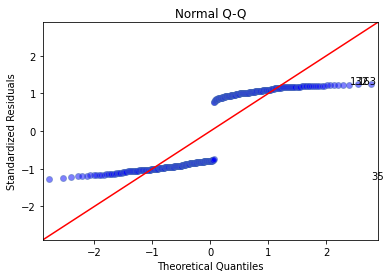

In [20]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

<AxesSubplot:xlabel='log_HDD', ylabel='Count'>

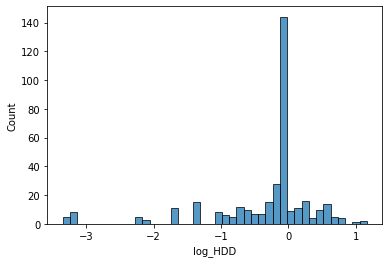

In [21]:
df["log_HDD"] = (df["HDD"]-np.mean(df["HDD"]))/np.sqrt(np.var(df["HDD"]))
df["log_HDD"] = np.log(np.abs(df["log_HDD"]))

#The following code made the model fit way worse and was therefore emitted
# df["log_CDD"] = (df["CDD"]-np.mean(df["CDD"]))/np.sqrt(np.var(df["CDD"]))
# df["log_CDD"] = np.sqrt(np.abs(df["log_CDD"]))
# df["departure_transformed"] = (df["departure"]-np.mean(df["departure"]))/np.sqrt(np.var(df["departure"]))

sns.histplot(df["log_HDD"])

# The following code was used to evaluate transformations
# sns.histplot(df["departure_transformed"])
# sns.histplot(df["departure"])
# df.loc[df["precipitation"] == np.inf]

<AxesSubplot:xlabel='HDD', ylabel='Count'>

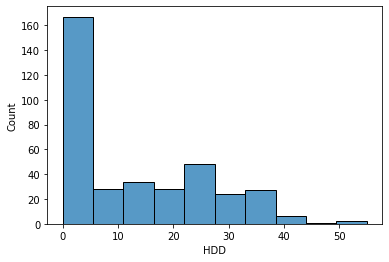

In [22]:
sns.histplot(df["HDD"])

In [23]:
tavg_df = df[["tavg","departure","log_HDD","CDD"]]

calculate_vif(tavg_df, features=["departure","log_HDD","CDD"])

,VIF,Tolerance
departure,1.229530,0.813319
log_HDD,1.150942,0.868854
CDD,1.244294,0.803669


In [24]:
X = df[["departure","log_HDD","CDD"]]
y = df["tavg"]
OLS_model = sm.OLS(y, sm.add_constant(X))
model_fit = OLS_model.fit()
model_fitted_y = model_fit.fittedvalues
model_fit.summary()

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tavg   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     334.0
Date:                Sat, 22 Oct 2022   Prob (F-statistic):          9.33e-104
Time:                        22:36:08   Log-Likelihood:                -1326.3
No. Observations:                 365   AIC:                             2661.
Df Residuals:                     361   BIC:                             2676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9164      0.682     67.359      0.000      44.576      47.257
departure      0.4673      0.083      5.606      0.000       0.303       0.631
log_HDD       -4.7265      0.638     -7.409      0.000      -5.981      -3.472
CDD            2.2252      0.084     26.344      0.000       2.059       2.391
==============================================================================
Omnibus:                       33.380   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.901
Skew:                           0.451   Prob(JB):                     2.89e-05
Kurtosis:                       2.252   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

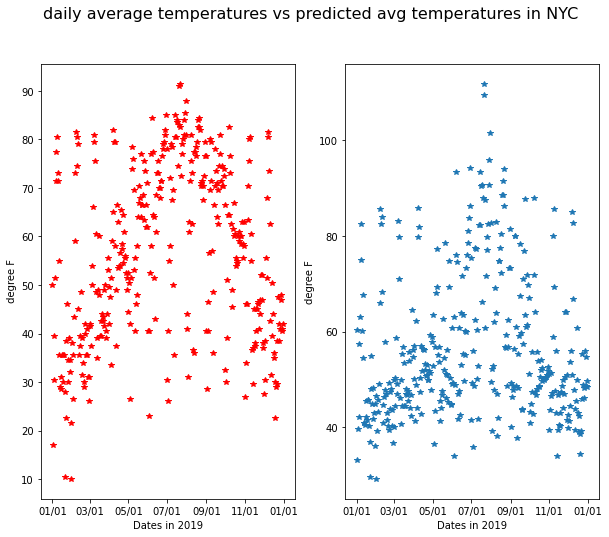

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("daily average temperatures"+
             " vs predicted avg temperatures in NYC", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel=" degree F")
ax2.set(xlabel="Dates in 2019",
       ylabel="degree F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tavg"], "r*")
ax2.plot(df["date"],model_fitted_y, "*")
plt.show()
y_hat_tavg = model_fitted_y.copy()

C:\Users\yousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


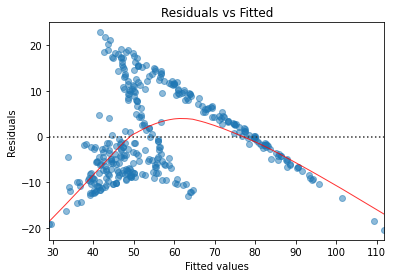

In [26]:
desired_df = pd.concat([X, y], axis=1) # creating a df from X, y for easier plot handling

model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # normalize residuals

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absoulte squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals

model_leverage = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, desired_df.columns[-1], data=desired_df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={"color":"red", "lw":1, "alpha":0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


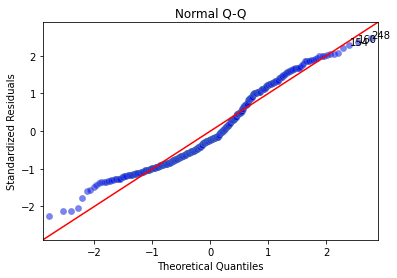

In [27]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));


In [28]:
X = df[["tavg"]]
y = df["tmax"]
OLS_model = sm.OLS(y, sm.add_constant(X))
model_fit = OLS_model.fit()
model_fitted_y = model_fit.fittedvalues
model_fit.summary()

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmax   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.222e+04
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:36:09   Log-Likelihood:                -834.57
No. Observations:                 365   AIC:                             1673.
Df Residuals:                     363   BIC:                             1681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1951      0.415     10.111      0.000       3.379       5.011
tavg           1.0467      0.007    149.060      0.000       1.033       1.061
==============================================================================
Omnibus:                       51.383   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.652
Skew:                           0.851   Prob(JB):                     6.84e-19
Kurtosis:                       4.613   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


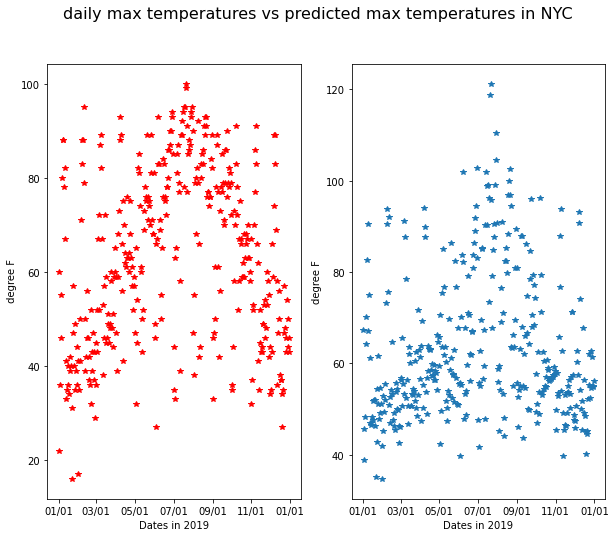

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("daily max temperatures"+
             " vs predicted max temperatures in NYC", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel=" degree F")
ax2.set(xlabel="Dates in 2019",
       ylabel="degree F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tmax"], "r*")
y_hat_max = model_fit.predict(sm.add_constant(y_hat_tavg))
ax2.plot(df["date"],y_hat_max, "*")
plt.show()

C:\Users\yousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


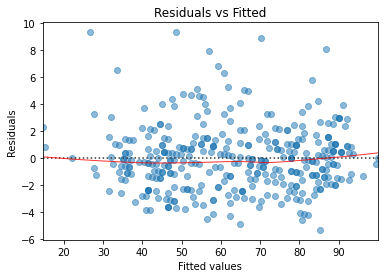

In [30]:
desired_df = pd.concat([X, y], axis=1) # creating a df from X, y for easier plot handling

model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # normalize residuals

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals)) # absoulte squared normalized residuals
model_abs_resid = np.abs(model_residuals) # absolute residuals

model_leverage = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, desired_df.columns[-1], data=desired_df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={"color":"red", "lw":1, "alpha":0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\yousi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


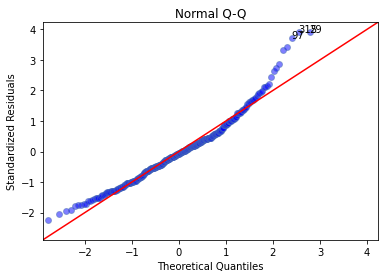

In [31]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));


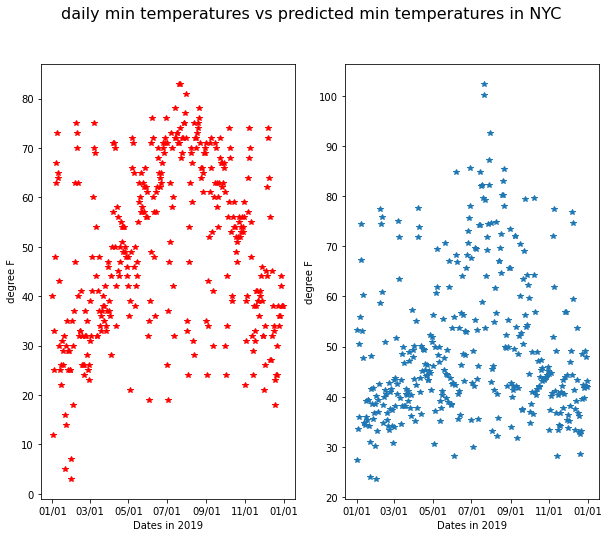

In [32]:
tmin_predicted = y_hat_tavg * 2 - y_hat_max

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.suptitle("daily min temperatures"+
             " vs predicted min temperatures in NYC", size=16)
ax1.set(xlabel="Dates in 2019",
       ylabel=" degree F")
ax2.set(xlabel="Dates in 2019",
       ylabel="degree F")
date_form = DateFormatter("%m/%d") #to format the date and omit the year
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax1.plot(df["date"],df["tmin"], "r*")
ax2.plot(df["date"],tmin_predicted, "*")
plt.show()

# HDD as target variable<br><br>

# 1. Data Importing and Pre-processing:

In [33]:
 # import the csv data as a dataframe
data = pd.read_csv("nyc_temperature.csv")
data_5= data.head()
# print(data_5)
# print(data_5.dtypes)

In [34]:
# will convert all T values to 0
data['CDD'] = data['CDD'].replace(['T'],'0')
data['precipitation'] = data['precipitation'].replace(['T'],'0')
data['new_snow'] = data['new_snow'].replace(['T'],'0')
data['snow_depth'] = data['snow_depth'].replace(['T'],'0')
data

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,1/1/19,60,40,50.0,13.9,15,0,0.08,0,0
1,2/1/19,41,35,38.0,2.1,27,0,0,0,0
2,3/1/19,45,39,42.0,6.3,23,0,0,0,0
3,4/1/19,47,37,42.0,6.5,23,0,0,0,0
4,5/1/19,47,42,44.5,9.1,20,0,0.45,0,0
...,...,...,...,...,...,...,...,...,...,...
360,27/12/19,54,42,48.0,10.8,17,0,0,0,0
361,28/12/19,50,44,47.0,10.0,18,0,0,0,0
362,29/12/19,44,38,41.0,4.3,24,0,0.29,0,0
363,30/12/19,43,38,40.5,4.0,24,0,0.49,0,0


In [35]:
# convert all values into float
data['tmax'] = data['tmax'].astype(float)
data['tmin'] = data['tmin'].astype(float)
data['tavg'] = data['tavg'].astype(float)
data['departure'] = data['departure'].astype(float)
data['HDD'] = data['HDD'].astype(float)
data['CDD'] = data['CDD'].astype(float)
data['precipitation'] = data['precipitation'].astype(float)
data['new_snow'] = data['new_snow'].astype(float)
data['snow_depth'] = data['snow_depth'].astype(float)
print(data.dtypes)

date              object
tmax             float64
tmin             float64
tavg             float64
departure        float64
HDD              float64
CDD              float64
precipitation    float64
new_snow         float64
snow_depth       float64
dtype: object


# 2. Statistical Analysis and Visualization:

In [36]:
#Now the variables needed for the statistical analysis of the data frame are all numerical
data[["tmax", "tmin", "tavg", "departure", "HDD", "CDD", "precipitation", "new_snow", "snow_depth"]].describe()

,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,63.169863,49.512329,56.341096,-0.527945,12.463014,4.065753,0.139342,0.042466,0.032877
std,18.806232,17.154853,17.821404,6.421460,13.264920,6.374835,0.321168,0.298309,0.294666
min,16.000000,3.000000,10.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35.000000,41.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,49.000000,56.000000,0.100000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,65.000000,72.000000,3.700000,24.000000,7.000000,0.080000,0.000000,0.000000
max,100.000000,83.000000,91.500000,17.400000,55.000000,27.000000,2.670000,3.800000,4.000000


In [37]:
#Now the variables needed for the statistical analysis of the data frame are all numerical
data[["tmax", "tmin", "tavg", "departure", "HDD", "CDD", "precipitation", "new_snow", "snow_depth"]].describe()

,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,63.169863,49.512329,56.341096,-0.527945,12.463014,4.065753,0.139342,0.042466,0.032877
std,18.806232,17.154853,17.821404,6.421460,13.264920,6.374835,0.321168,0.298309,0.294666
min,16.000000,3.000000,10.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35.000000,41.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,49.000000,56.000000,0.100000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,65.000000,72.000000,3.700000,24.000000,7.000000,0.080000,0.000000,0.000000
max,100.000000,83.000000,91.500000,17.400000,55.000000,27.000000,2.670000,3.800000,4.000000


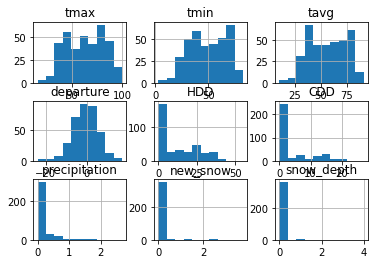

In [38]:
# will calculate and plot histograms for the different variables
data.hist()
plt.show()

In [39]:
# convert the columns in the dataframe to np arrays
# used np.asarray to convert to array
HDD_array = np.asarray(data["HDD"].to_numpy())
tmax_array = np.asarray(data["tmax"].to_numpy())
tmax_array=tmax_array.reshape(-1,1)
tmin_array = np.asarray(data["tmin"].to_numpy())
tmin_array=tmin_array.reshape(-1,1)
tavg_array = np.asarray(data["tavg"].to_numpy())
tavg_array=tavg_array.reshape(-1,1)
departure_array=np.asarray(data["departure"].to_numpy())
departure_array=departure_array.reshape(-1,1)
HDD_array=np.asarray(data["HDD"].to_numpy())
HDD_array=HDD_array.reshape(-1,1)
CDD_array=np.asarray(data["CDD"].to_numpy())
CDD_array=CDD_array.reshape(-1,1)
precipitation_array=np.asarray(data["precipitation"].to_numpy())
precipitation_array=precipitation_array.reshape(-1,1)
new_snow_array=np.asarray(data["new_snow"].to_numpy())
new_snow_array=new_snow_array.reshape(-1,1)
snow_depth_array=np.asarray(data["snow_depth"].to_numpy())
snow_depth_array=snow_depth_array.reshape(-1,1)

Text(0.5, 1.0, 'snow_depth')

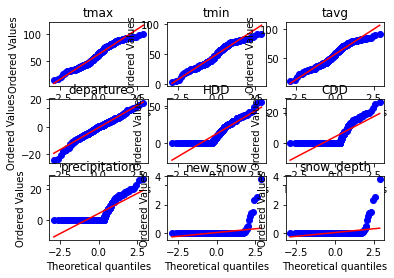

In [40]:
#from scipy import stats
fig= plt.figure()
tmax_plt=fig.add_subplot(3,3,1)
tmax_1d=tmax_array.reshape(365,)
tmax_norm=stats.probplot(tmax_1d,plot=plt)
plt.title("tmax")

tmin_plt=fig.add_subplot(3,3,2)
tmin_1d=tmin_array.reshape(365,)
tmin_norm=stats.probplot(tmin_1d,plot=plt)
plt.title("tmin")

tavg_plt=fig.add_subplot(3,3,3)
tavg_1d=tavg_array.reshape(365,)
tavg_norm=stats.probplot(tavg_1d,plot=plt)
plt.title("tavg")

departure_plt=fig.add_subplot(3,3,4)
departure_1d=departure_array.reshape(365,)
departure_norm=stats.probplot(departure_1d,plot=plt)
plt.title("departure")

HDD_plt=fig.add_subplot(3,3,5)
HDD_1d=HDD_array.reshape(365,)
HDD_norm=stats.probplot(HDD_1d,plot=plt)
plt.title("HDD")

CDD_plt=fig.add_subplot(3,3,6)
CDD_1d=CDD_array.reshape(365,)
CDD_norm=stats.probplot(CDD_1d,plot=plt)
plt.title("CDD")

precipitation_plt=fig.add_subplot(3,3,7)
precipitation_1d=CDD_array.reshape(365,)
precipitation_norm=stats.probplot(precipitation_1d,plot=plt)
plt.title("precipitation")

new_snow_plt=fig.add_subplot(3,3,8)
new_snow_1d=new_snow_array.reshape(365,)
new_snow_norm=stats.probplot(new_snow_1d,plot=plt)
plt.title("new_snow")

snow_depth_plt=fig.add_subplot(3,3,9)
snow_depth_1d=new_snow_array.reshape(365,)
snow_depth_norm=stats.probplot(snow_depth_1d,plot=plt)
plt.title("snow_depth")

 Based on the plotted histograms the departure seems like the best normally distributed variable <br>
 the snow_depth and new_snow seem to be the least normally distributed       <br>
 this can be due to a few number of days of snow meaning few samples        <br>
 However, according to the normal probability plots above tmax,tmin, tavg and departure seem to be a Gaussian distribution <br>

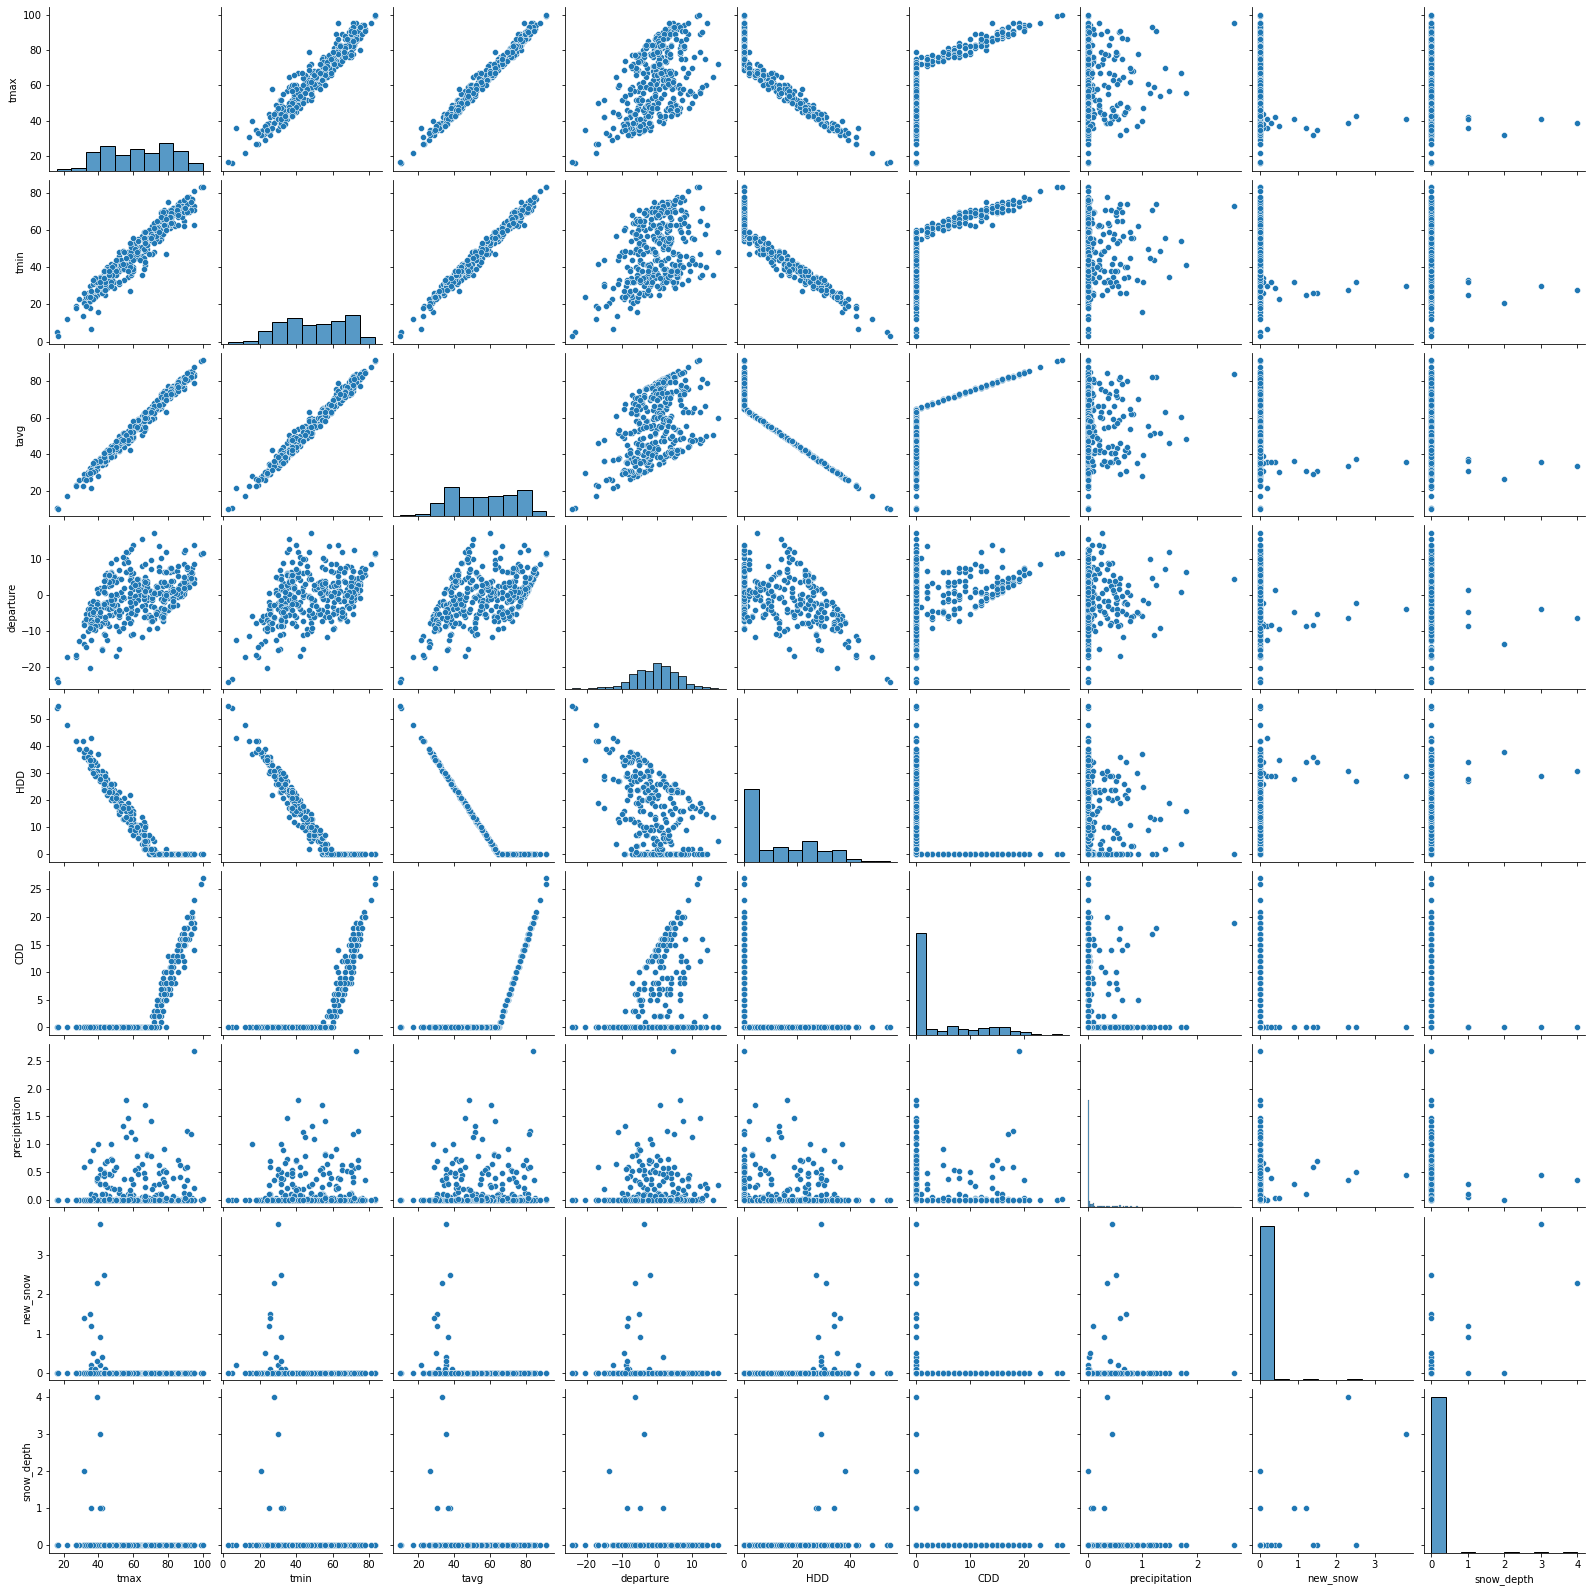

In [41]:
sns.pairplot(data)
plt.show()

Based on the visualizations above, it looks like HDD has negative correlation with tmin, tmax, and taverage <br>
we can confirm this visual correlaion by calculating the correlation coeffients <br>
Other examples that show strong correlation are the following:(tmax, taverage), (tmax,tmin), (tmin, taverage) <br>
Examples that show no good correlations are the following:(precipitation, tmax), (precipitation, HDD), (tmin, precipitation)

In [42]:
# calculate correlation between the columns
data.corr()

,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tmax,1.000000,0.964680,0.991930,0.504420,-0.948704,0.801030,0.008210,-0.183409,-0.146762
tmin,0.964680,1.000000,0.990294,0.433581,-0.951052,0.792244,0.015270,-0.174763,-0.141384
tavg,0.991930,0.990294,1.000000,0.474830,-0.958306,0.803954,0.011681,-0.180886,-0.145484
departure,0.504420,0.433581,0.474830,1.000000,-0.477517,0.332172,0.033311,-0.104159,-0.100274
HDD,-0.948704,-0.951052,-0.958306,-0.477517,1.000000,-0.600872,-0.025594,0.197466,0.159156
CDD,0.801030,0.792244,0.803954,0.332172,-0.600872,1.000000,-0.020160,-0.091041,-0.071355
precipitation,0.008210,0.015270,0.011681,0.033311,-0.025594,-0.020160,1.000000,0.121013,0.044353
new_snow,-0.183409,-0.174763,-0.180886,-0.104159,0.197466,-0.091041,0.121013,1.000000,0.693532
snow_depth,-0.146762,-0.141384,-0.145484,-0.100274,0.159156,-0.071355,0.044353,0.693532,1.000000


The correlation between HDD and tmax= -0.948
The correlation between HDD and tmin= -0.951
The correlation between HDD and taverage= -0.958

# 3. Regression Model

Based on the correlation table above we will develop  regression models to predict HDD from tmax, tmin, taverage and departure<br>
will develop five regression models: <br>
(HDD a function of tmax) <br>
(HDD a function of tmin)  <br>
(HDD a function of taverage) <br>
(HDD a function of both tmax and tmin) <br>
(HDD a function of tmax, tmin and depature) <br>
for each one of these regression models will calculate the mean square error (MSE) and will choose the model with the least value of MSE <br>

In [43]:
# first regression model_1 of HDD as a function of tmax
model_1=LinearRegression().fit(tmax_array, HDD_array )
print(model_1)
b_0=model_1.intercept_
print("b_0=", model_1.intercept_)
b_1=model_1.coef_
print("b_1=", model_1.coef_[0])

LinearRegression()
b_0= [54.73412354]
b_1= [-0.66916577]


In [44]:
#find Y_hat
Y_hat=b_0+b_1*tmax_array
#print("Y_hat=", Y_hat)
Y_hat=Y_hat.reshape(-1,1)

**fit a regression line of model_1 to the scatter plot of tmax vs HDD**

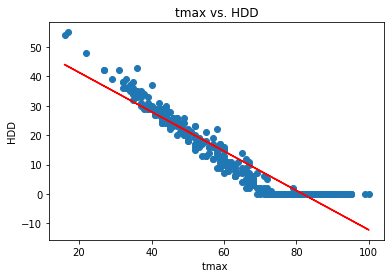

In [45]:
plt.scatter(tmax_array, HDD_array)
plt.title("tmax vs. HDD")
plt.xlabel("tmax ")
plt.ylabel("HDD")
plt.plot(tmax_array, Y_hat, color='red')
plt.show()

In [46]:
# Calculate MSE=SSE/(n-2) for the regression model_1
#first calculate SSE
n=365
E_1=(HDD_array-Y_hat)**2
#print(E_1)
#print(E_1.shape)
SSE_1=np.sum(E_1)
print("SSE_1=", SSE_1)
MSE_1=SSE_1/(n-2)
print("MSE_tmax_HDD=", MSE_1)

SSE_1= 6402.323519271758
MSE_tmax_HDD= 17.637254874026883


**second regression model_2 of HDD as a function of tmin**


In [47]:
# second regression model_2 of HDD as a function of tmin
model_2=LinearRegression().fit(tmin_array, HDD_array )
print(model_2)
b_0=model_2.intercept_
print("b_0=", model_2.intercept_)
b_1=model_2.coef_
print("b_1=", model_2.coef_[0])

LinearRegression()
b_0= [48.87422179]
b_1= [-0.7353968]


In [48]:
#find Y_hat
Y_hat=b_0+b_1*tmin_array
#print("Y_hat_=", Y_hat)
Y_hat=Y_hat.reshape(-1, 1)

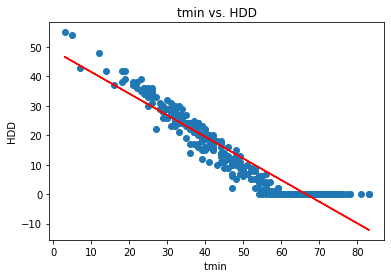

In [49]:
#fit a regression line of model_2 to the scatter plot of tmin vs HDD

plt.scatter(tmin_array, HDD_array)
plt.title("tmin vs. HDD")
plt.xlabel("tmin ")
plt.ylabel("HDD")
plt.plot(tmin_array, Y_hat, color='red')
plt.show()

In [50]:
# Calculate MSE=SSE/(n-2) for the regression model_2
#first calculate SSE
E_2=(HDD_array-Y_hat)**2
SSE_2=np.sum(E_2)
MSE_2=SSE_2/(n-2)
print("MSE_tmin_HDD=", MSE_2)

MSE_tmin_HDD= 16.850422294766958


**third regression model_3 of HDD as a function of tavg**

In [51]:
model_3=LinearRegression().fit(tavg_array, HDD_array )
print(model_3)
b_0=model_3.intercept_
print("b_0=", model_3.intercept_)
b_1=model_3.coef_
print("b_1=", model_3.coef_[0])

LinearRegression()
b_0= [52.65061535]
b_1= [-0.71329109]


In [52]:
#find Y_hat
Y_hat=b_0+b_1*tavg_array
#print("Y_hat_=", Y_hat)
Y_hat=Y_hat.reshape(-1, 1)

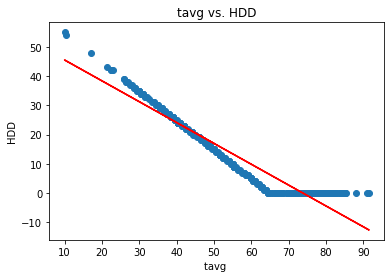

In [53]:
#fit a regression line of model_3 to the scatter plot of tavg vs HDD

plt.scatter(tavg_array, HDD_array)
plt.title("tavg vs. HDD")
plt.xlabel("tavg ")
plt.ylabel("HDD")
plt.plot(tavg_array, Y_hat, color='red')
plt.show()

In [54]:
# Calculate MSE=SSE/(n-2) for the regression model_3
#first calculate SSE
E_3=(HDD_array-Y_hat)**2
SSE_3=np.sum(E_3)
MSE_3=SSE_3/(n-2)
print("MSE_tavg_HDD=", MSE_3)

MSE_tavg_HDD= 14.406594939745002


**Fourth regression model_4 is a multi regression linear model of HDD as a function of (tmax and tmin)**

In [55]:
tmax_min=np.concatenate((tmax_array, tmin_array), axis=1)
#print(tmax_min.shape)
model_4=LinearRegression().fit(tmax_min, HDD_array )
print(model_4)
b_0=model_4.intercept_
print("b_0=", model_4.intercept_)
b_1=model_4.coef_
print("b_1=", model_4.coef_[0])

LinearRegression()
b_0= [52.30678213]
b_1= [-0.31758083 -0.39954151]


In [56]:
#find Y_hat
Y_hat=b_0+b_1[0,0]*tmax_array+b_1[0,1]*tmin_array
#print("Y_hat_=", Y_hat)
Y_hat=Y_hat.reshape(-1, 1)

C:\Users\yousi\AppData\Local\Temp/ipykernel_14552/1425713347.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


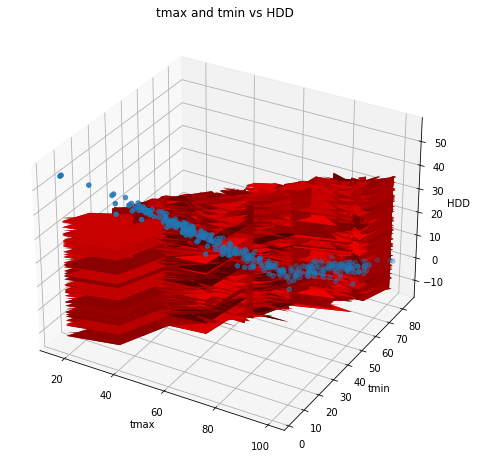

In [57]:
#fit a regression line of model_4 to the scatter plot of tmax_min vs HDD
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection="3d")
ax.scatter(tmax_array.reshape(365,),tmin_array.reshape(365,), HDD_array.reshape(365,))
ax.set_xlabel("tmax")
ax.set_ylabel("tmin")
ax.set_zlabel("HDD")
ax.set_title("tmax and tmin vs HDD")
ax.plot_surface(tmax_array.reshape(365,),tmin_array.reshape(365,), Y_hat.reshape(365,1),color="red")

fig.show()

In [58]:
# Calculate MSE=SSE/(n-2) for the regression model_4
#first calculate SSE
E_4=(HDD_array-Y_hat)**2
SSE_4=np.sum(E_4)
MSE_4=SSE_4/(n-2)
print("MSE_tmax_tmin=", MSE_4)

MSE_tmax_tmin= 14.3682986973997


**Fifth regression model_5 is a multi regression linear model of HDD as a function of (tmax, tmin and depature)**

In [59]:
tmax_min_dep=np.concatenate((tmax_array, tmin_array, departure_array), axis=1)
#print(tmax_min_dep.shape)
model_5=LinearRegression().fit(tmax_min_dep, HDD_array )
print(model_5)
b_0=model_5.intercept_
print("b_0=", model_5.intercept_)
b_1=model_5.coef_
print("b_1=", model_5.coef_[0])

LinearRegression()
b_0= [51.29119268]
b_1= [-0.28483031 -0.4216379  -0.07725642]


In [60]:
#find Y_hat
Y_hat=b_0+b_1[0,0]*tmax_array+b_1[0,1]*tmin_array+b_1[0,2]*departure_array
#print("Y_hat_=", Y_hat)
Y_hat=Y_hat.reshape(-1, 1)

In [61]:
# Calculate MSE=SSE/(n-2) for the regression model_5
#first calculate SSE
E_5=(HDD_array-Y_hat)**2
SSE_5=np.sum(E_5)
MSE_5=SSE_5/(n-2)
print("MSE_tmax_tmin_dep=", MSE_5)

MSE_tmax_tmin_dep= 14.194298417750032


# Comparison of the five regession models
we calculated the mean square errors for the five models and compared them <br>
$\bf{Model 5}$ which is the multiple regression model of HDD as a function of `tmax`, `tmin` and `departure`, has the least mean square error MSE of 14.19429 compared to the other four models which have MSEs: MSE_tmax_HDD $= 17.637254$, MSE_tmin_HDD= $16.85042$,MSE_tavg_HDD $= 14.40659$, MSE_tmax_tmin $= 14.36829$  <br>
Therefore this model results in the best predictions <br>
Next we will evaluate the assumptions of the regression model: linearity and normal distribution <br>

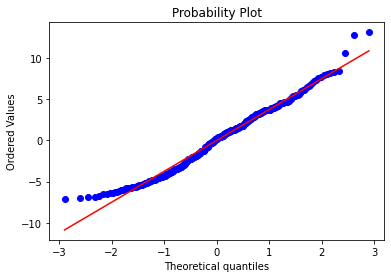

In [62]:
#testing the normality assumption for the residuals
residuals=HDD_array-Y_hat
stats.probplot(residuals.reshape(365,),plot=plt)
plt.show()

the results show that the residuals are almost normally distributed

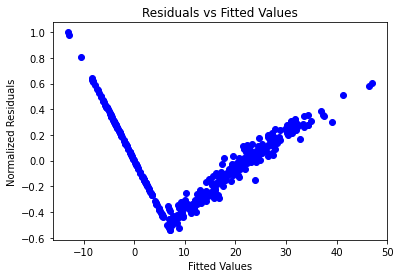

In [63]:
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Normalized Residuals")

plt.scatter(Y_hat, (residuals/max(np.abs(residuals))),color='blue')
plt.show()

Since the residuals have higher values for low and high fitted values, and smaller values in the middle <br>
therefore a linear model doesnt seem the best fit <br>